In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('fifa_ols.csv', index_col=0)
df.head()

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,Special,International Reputation,Skill Moves,Joined,Loaned From,Contract Valid Until,Age_C,Over_C,Special_C,WR
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,2202,5.0,4.0,"Jul 1, 2004",NaN,2021,6,18,1,2.0
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,2228,5.0,5.0,"Jul 10, 2018",NaN,2022,7,18,1,2.0
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,2143,5.0,5.0,"Aug 3, 2017",NaN,2022,4,17,1,3.0
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,1471,4.0,1.0,"Jul 1, 2011",NaN,2020,5,16,0,2.0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,2281,4.0,4.0,"Aug 30, 2015",NaN,2023,5,16,1,4.0


<AxesSubplot:xlabel='Value', ylabel='Density'>

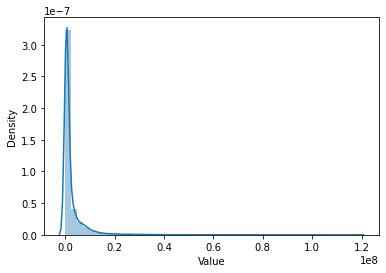

In [ ]:
sns.distplot(df.Value)

<AxesSubplot:xlabel='Value', ylabel='Density'>

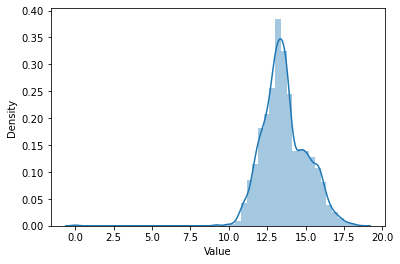

In [ ]:
sns.distplot(np.log1p(df.Value))

In [ ]:
df.columns

Index(['Name', 'Age', 'Nation_C', 'Club_V', 'Club_N', 'Overall', 'Potential',
       'Position_Class', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Age_C', 'Over_C', 'Special_C', 'WR'],
      dtype='object')

In [3]:
# 클럽 v넣기
df1=df[['Club_V','Position_Class', 'Value', 'Wage','International Reputation',
       'Age_C', 'Over_C', 'Special_C']]
df1.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C
0,3,3,110500000.0,565000.0,5.0,6,18,1
1,3,3,77000000.0,405000.0,5.0,7,18,1
2,3,3,118500000.0,290000.0,5.0,4,17,1
3,3,0,72000000.0,260000.0,4.0,5,16,0
4,3,2,102000000.0,355000.0,4.0,5,16,1


<AxesSubplot:>

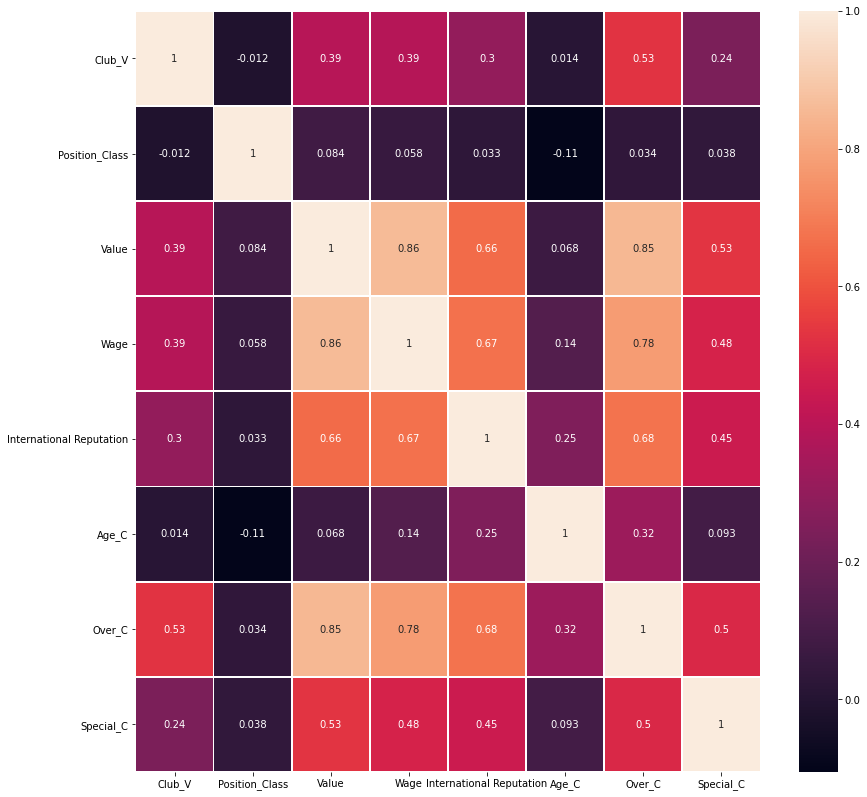

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(),linewidths=.8, annot=True) 

In [ ]:
df1.columns

Index(['Club_V', 'Position_Class', 'Value', 'Wage', 'International Reputation',
       'Age_C', 'Over_C', 'Special_C'],
      dtype='object')

In [ ]:
df_o.columns

Index(['Value', 'Wage', 'International Reputation', 'Club_V_0', 'Club_V_1',
       'Club_V_2', 'Club_V_3', 'Position_Class_0', 'Position_Class_1',
       'Position_Class_2', 'Position_Class_3', 'Age_C_1', 'Age_C_10',
       'Age_C_11', 'Age_C_2', 'Age_C_3', 'Age_C_4', 'Age_C_5', 'Age_C_6',
       'Age_C_7', 'Age_C_8', 'Age_C_9', 'Over_C_1', 'Over_C_10', 'Over_C_11',
       'Over_C_12', 'Over_C_13', 'Over_C_14', 'Over_C_15', 'Over_C_16',
       'Over_C_17', 'Over_C_18', 'Over_C_2', 'Over_C_3', 'Over_C_4',
       'Over_C_5', 'Over_C_6', 'Over_C_7', 'Over_C_8', 'Over_C_9',
       'Special_C_0', 'Special_C_1'],
      dtype='object')

In [ ]:
# df1.Over_C=df1.Over_C.astype('float')
# df1.Age_C=df1.Age_C.astype('float')
# df1.Club_V=df1.Club_V.astype('float')
# df1.Position_Class=df1.Position_Class.astype('float')
# df1.Special_C = df1.Special_C.astype('float')

In [4]:
# 범주화 -> 원핫인코딩
df1.Over_C=df1.Over_C.astype('str')
df1.Age_C=df1.Age_C.astype('str')
df1.Club_V=df1.Club_V.astype('str')
df1.Position_Class=df1.Position_Class.astype('str')
df1.Special_C = df1.Special_C.astype('str')
# df['International Reputation']=df['International Reputation'].astype('str')
df_o=pd.get_dummies(df1)

In [5]:
X= df_o.drop(['Wage'],axis = 1)
y= df_o['Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)
# 단순 회귀 분석 모형 생성 및 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.3f}, RMSE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

MSE: 116657604.383, RMSE: 10800.815, r2 score: 0.842


In [ ]:
Nationa 빼기 전 MSE: 116897521.259, RMSE: 10811.916, r2 score: 0.841
Wr 빼기 전,  후 MSE: 116708754.501, RMSE: 10803.183, r2 score: 0.842
Skill Moves  빼기 전,  후 MSE: 116658189.445, RMSE: 10800.842, r2 score: 0.842
Potential 빼기 전,     후 MSE: 116657234.829, RMSE: 10800.798, r2 score: 0.842
                       후 MSE: 116657604.383, RMSE: 10800.815, r2 score: 0.842

In [ ]:
coef(기울기, 회귀 계수)

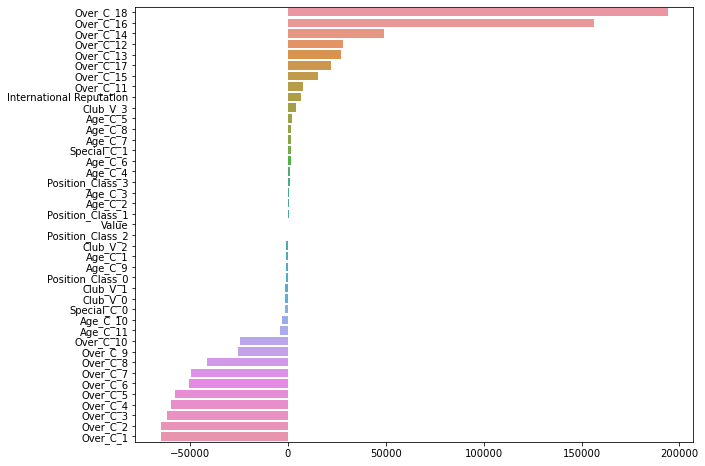

In [6]:
plt.figure(figsize=(10,8))
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [7]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-7.32117194e+08 -3.99499190e+07 -9.54622797e+06 -4.70177699e+06
 -6.43783906e+06]
 5 folds 의 개별 RMSE scores :  [27057.66  6320.59  3089.7   2168.36  2537.29]
 5 folds 의 평균 RMSE : 8234.721 


In [8]:
def get_model_cv_prediction(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [9]:
from sklearn.linear_model import Ridge
alphas = [2900,3300,3330,3350,3370,3400]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha ={0:}, 5 folds의 평균 RMSE: {1:.4f}'.format(alpha, avg_rmse))    

alpha =2900, 5 folds의 평균 RMSE: 7283.3056
alpha =3300, 5 folds의 평균 RMSE: 7266.1119
alpha =3330, 5 folds의 평균 RMSE: 7265.1244
alpha =3350, 5 folds의 평균 RMSE: 7264.4865
alpha =3370, 5 folds의 평균 RMSE: 7263.8644
alpha =3400, 5 folds의 평균 RMSE: 7262.9606


In [10]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3300)
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE socres:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {:.4f}'.format(avg_rmse))

5 folds의 개별 Negative MSE socres: [-5.88478581e+08 -4.16362375e+07 -8.55198300e+06 -2.88559816e+06
 -9.92583390e+05]
5 folds의 개별 RMSE scores [24258.58  6452.61  2924.38  1698.7    996.28]
5 folds의 평균 RMSE: 7266.1119


In [11]:
# 라쏘 회귀
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params = None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha= param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores= cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {}일 때 5 폴드 세트의 평균 RMSE:{:.4f}'.format(param, avg_rmse))
        model.fit(X, y)
        coeff=pd.Series(data=model.coef_, index=X.columns)
        colname='alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [13]:
lasso_alphas=[0.001,0.01,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X, 
                                     y_target_n = y)
coeff_lasso_df

###### Lasso ######
alpha 0.001일 때 5 폴드 세트의 평균 RMSE:8209.3826
alpha 0.01일 때 5 폴드 세트의 평균 RMSE:8210.7345
alpha 1일 때 5 폴드 세트의 평균 RMSE:8266.2696
alpha 3일 때 5 폴드 세트의 평균 RMSE:8278.8643


,alpha:0.001,alpha:0.01,alpha:1,alpha:3
Value,1.382455e-03,1.384892e-03,1.612184e-03,1.910370e-03
International Reputation,6.971860e+03,6.978100e+03,7.531335e+03,8.256959e+03
Club_V_0,-3.018347e+03,-2.970548e+03,-6.321902e+02,-6.276610e+02
Club_V_1,-2.957103e+03,-2.909112e+03,-5.630580e+02,-5.533469e+02
Club_V_2,-2.393241e+03,-2.345002e+03,3.249857e+00,4.578649e+00
Club_V_3,2.392756e+03,2.440659e+03,4.726923e+03,4.633131e+03
Position_Class_0,-1.449647e+03,-1.448037e+03,-1.294237e+03,-1.091061e+03
Position_Class_1,2.207792e+01,2.305317e+01,1.150127e+02,2.346984e+02
Position_Class_2,-4.909170e+02,-4.910444e+02,-5.038884e+02,-5.198720e+02
Position_Class_3,4.841993e+02,4.839244e+02,4.569856e+02,4.118966e+02


In [ ]:
종속변수 로그화

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('RMSLE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}, R2: {3:.4f}'.format(rmsle_val, rmse_val, mae_val, r2))


value log화

In [ ]:
log_value=np.log1p(df.Value)
df_o_log_value = pd.concat([df_o,log_value], axis=1)
df_o_log_value.drop('Value', axis=1, inplace=True)

In [ ]:
# 종속변수, 독립변수 둘 다  Value 로그화-> 음.. 떨어진다!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

y = df_o['Wage']
log_y = np.log1p(y)
X_v= df_o_log_value.drop('Wage', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X_v, log_y ,test_size=0.2, 
                                                       random_state=1)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train ,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE:0.6564, RMSE:12128.7052, MAE:4500.1337, R2: 0.7582


In [15]:
# 종속변수만  로그화
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

y = df_o['Wage']
log_y = np.log1p(y)
X= df_o.drop('Wage', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X, log_y ,test_size=0.2, 
                                                       random_state=1)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train ,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE:0.6497, RMSE:23582.2343, MAE:4939.3550, R2: 0.0857


In [ ]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X, log_y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSLE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSLE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-5.71 -0.54 -0.42 -0.4  -0.16]
 5 folds 의 개별 RMSLE scores :  [2.39 0.73 0.65 0.63 0.4 ]
 5 folds 의 평균 RMSLE : 0.961 


In [ ]:
from sklearn.linear_model import Ridge
alphas = [0.06,0.05,0.04,0.03,0.02,0.01]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha ={0:}, 5 folds의 평균 RMSLE: {1:.4f}'.format(alpha, avg_rmse))    

alpha =0.06, 5 folds의 평균 RMSLE: 8232.7354
alpha =0.05, 5 folds의 평균 RMSLE: 8233.0164
alpha =0.04, 5 folds의 평균 RMSLE: 8233.3164
alpha =0.03, 5 folds의 평균 RMSLE: 8233.6360
alpha =0.02, 5 folds의 평균 RMSLE: 8233.9760
alpha =0.01, 5 folds의 평균 RMSLE: 8234.3374


In [ ]:
alpha =0.05일 때 가장 작은 RMSLE

<AxesSubplot:>

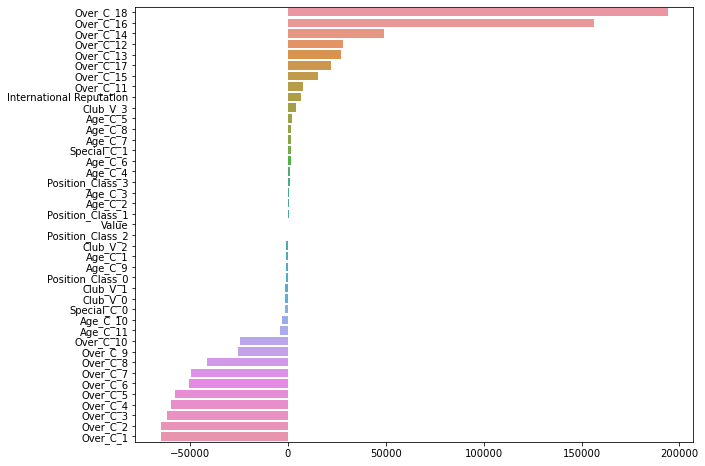

In [ ]:
plt.figure(figsize=(10,8))
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X, log_y, 
                                                    test_size=0.2, random_state=1)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.05)
lasso_reg = Lasso(alpha=0.0002)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE:0.6497, RMSE:23582.2343, MAE:4939.3550, R2: 0.0857
### Ridge ###
RMSLE:0.6497, RMSE:23512.3891, MAE:4935.9831, R2: 0.0912
### Lasso ###
RMSLE:0.6501, RMSE:35353.8018, MAE:5202.7794, R2: -1.0548


In [ ]:
lasso 알파는 커질수록 일부 피처의 회귀 계수가 0이 될 수 있는데..
너무 작아서 좋지 않아보인다. - 

In [ ]:
lasso_alphas=[0.0001,0.0002,0.0003,0.0004,1,5,10]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X, 
                                     y_target_n = log_y)
coeff_lasso_df

###### Lasso ######
alpha 0.0001일 때 5 폴드 세트의 평균 RMSE:0.9597
alpha 0.0002일 때 5 폴드 세트의 평균 RMSE:0.9587
alpha 0.0003일 때 5 폴드 세트의 평균 RMSE:0.9590
alpha 0.0004일 때 5 폴드 세트의 평균 RMSE:0.9609
alpha 1일 때 5 폴드 세트의 평균 RMSE:2.2858
alpha 5일 때 5 폴드 세트의 평균 RMSE:2.2858
alpha 10일 때 5 폴드 세트의 평균 RMSE:2.2857


,alpha:0.0001,alpha:0.0002,alpha:0.0003,alpha:0.0004,alpha:1,alpha:5,alpha:10
Value,1.382211e-03,0.001382,1.382265e-03,1.382292e-03,1.612184e-03,2.157605e-03,2.565970e-03
International Reputation,6.971236e+03,6971.305794,6.971375e+03,6.971444e+03,7.531335e+03,8.876808e+03,9.825595e+03
Club_V_0,-3.023127e+03,-3022.595896,-3.022065e+03,-3.021534e+03,-6.321902e+02,-6.175179e+02,-5.969704e+02
Club_V_1,-2.961902e+03,-2961.368480,-2.960835e+03,-2.960302e+03,-5.630580e+02,-5.425786e+02,-5.130818e+02
Club_V_2,-2.398065e+03,-2397.528667,-2.396993e+03,-2.396457e+03,3.249857e+00,2.787947e+00,1.900537e+00
Club_V_3,2.387966e+03,2388.498282,2.389031e+03,2.389563e+03,4.726923e+03,4.541657e+03,4.330057e+03
Position_Class_0,-1.449808e+03,-1449.789906,-1.449772e+03,-1.449754e+03,-1.294237e+03,-9.068916e+02,-6.152754e+02
Position_Class_1,2.198040e+01,21.991235,2.200207e+01,2.201291e+01,1.150127e+02,3.326599e+02,4.717275e+02
Position_Class_2,-4.909042e+02,-490.905629,-4.909070e+02,-4.909085e+02,-5.038884e+02,-5.334303e+02,-5.773360e+02
Position_Class_3,4.842268e+02,484.223709,4.842207e+02,4.842176e+02,4.569856e+02,3.685962e+02,2.742809e+02


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(random_state=0, n_estimators=500)
# gb_reg=GradientBoostingRegressoressor(random_state=0, n_estimators=500)
xbg_reg=XGBRegressor(n_estimators=500)
lgb_reg=LGBMRegressor(n_estimators=500)

models=[lr_reg,rf_reg, xbg_reg, lgb_reg]
for model in models:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=False)

### LinearRegression ###
RMSLE:0.0697, RMSE:0.6497, MAE:0.4719, R2: 0.7227
### RandomForestRegressor ###
RMSLE:0.0745, RMSE:0.6969, MAE:0.4976, R2: 0.6809
### XGBRegressor ###
RMSLE:0.0749, RMSE:0.7054, MAE:0.5019, R2: 0.6731
### LGBMRegressor ###
RMSLE:0.0694, RMSE:0.6515, MAE:0.4676, R2: 0.7212
